In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Does positivity dertermine danceability in music

In [65]:
music = pd.read_csv("./Resources/data.csv")
music

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


In [66]:
y = music.danceability.values.reshape(2017,1)
X = music.iloc[:,1:3].values.reshape(2017,2)
X

array([[0.0102 , 0.833  ],
       [0.199  , 0.743  ],
       [0.0344 , 0.838  ],
       ...,
       [0.00857, 0.637  ],
       [0.00164, 0.557  ],
       [0.00281, 0.446  ]])

ValueError: x and y must be the same size

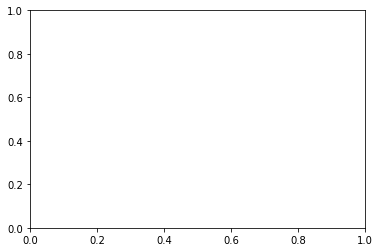

In [55]:
plt.scatter(X, y)

In [67]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
print("Weight coefficient" , model.coef_)
print("y-axis intercept:", model.intercept_)

Weight coefficient [[9.6037863e-17 1.0000000e+00]]
y-axis intercept: [-2.22044605e-16]


In [69]:
x_min  = np.array([[X.min()]])
x_max  = np.array([[X.max()]])
x_max

array([[0.995]])

In [59]:
y_min = model.predict(x_min)
y_max = model.predict(x_max)
print(f"ymin {y_min} \nymax {y_max}")

ValueError: shapes (1,1) and (2,1) not aligned: 1 (dim 1) != 2 (dim 0)

ValueError: x and y must be the same size

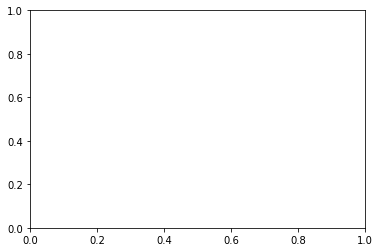

In [60]:
plt.scatter(X, y, c="blue")
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c="red")

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [71]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [72]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [23]:
# model.fit(X_train_scaled, y_train_scaled)

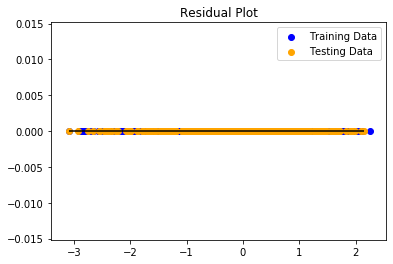

In [73]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [74]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
print(f"MSE: {MSE}\nr2: {r2}")

MSE: 1.0298019009415698e-29
r2: 1.0
